# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot

# Connecting plotly

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

# Loading csv file into dataframe and filtering it

In [42]:
df= pd.read_csv("matches.csv")
df

,Unnamed: 0,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium
...,...,...,...,...,...,...,...,...,...,...,...
60524,165,1888/1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60525,166,1888/1889,1889-04-06,Stoke,NaN,1.0,1.0,NaN,Derby County,NaN,NaN
60526,167,1888/1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60527,168,1888/1889,1889-04-14,Blackburn,NaN,3.0,0.0,NaN,Derby County,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60529 entries, 0 to 60528
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60529 non-null  int64  
 1   Season      60529 non-null  object 
 2   Date        50568 non-null  object 
 3   Home        50568 non-null  object 
 4   xG          2660 non-null   float64
 5   Home Goals  50568 non-null  float64
 6   Away Goals  50568 non-null  float64
 7   xG.1        2660 non-null   float64
 8   Away        50568 non-null  object 
 9   Attendance  11446 non-null  float64
 10  Venue       12406 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 5.1+ MB


In [6]:
df.shape

(60529, 11)

In [7]:
print("row is ",df.shape[0])
print("column is ",df.shape[1])

row is  60529
column is  11


In [8]:
df.isna().sum()

Unnamed: 0        0
Season            0
Date           9961
Home           9961
xG            57869
Home Goals     9961
Away Goals     9961
xG.1          57869
Away           9961
Attendance    49083
Venue         48123
dtype: int64

<Axes: >

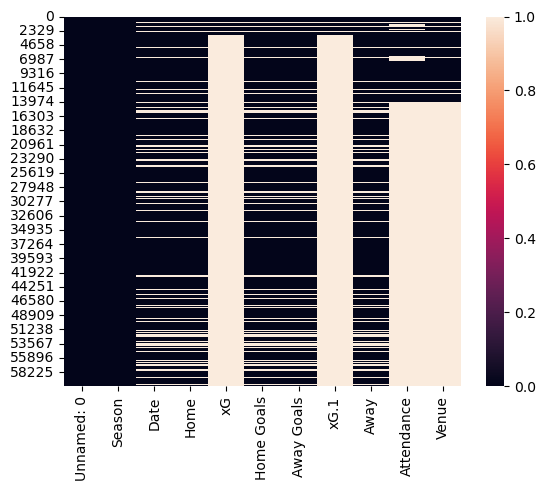

In [9]:
sns.heatmap(df.isna())

### Dropping rows with NaN values

In [43]:
df.dropna(inplace=True)

<Axes: >

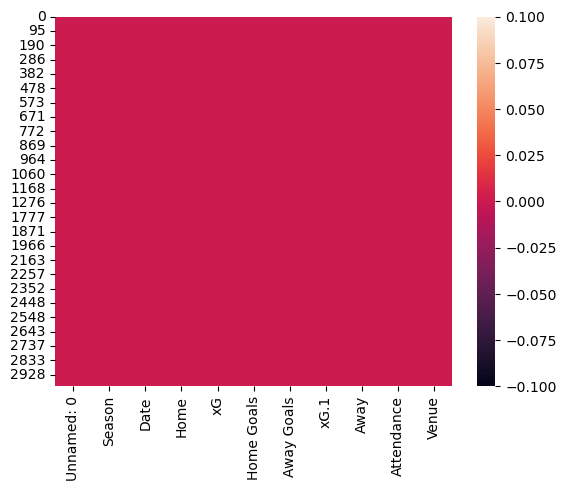

In [44]:
sns.heatmap(df.isna())

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,60529.0,248.176444,149.038937,0.0,121.0,243.0,368.0,628.0
xG,60529.0,0.066110,0.356256,0.0,0.0,0.0,0.0,7.0
Home Goals,60529.0,1.504700,1.496256,0.0,0.0,1.0,2.0,12.0
Away Goals,60529.0,0.979580,1.134411,0.0,0.0,1.0,2.0,9.0
xG.1,60529.0,0.053987,0.297192,0.0,0.0,0.0,0.0,4.6
Attendance,60529.0,6296.218639,14430.872095,0.0,0.0,0.0,0.0,83222.0


In [13]:
df["Unnamed: 0"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [45]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [46]:
df

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium
...,...,...,...,...,...,...,...,...,...,...
3003,2017/2018,2018-05-13,Huddersfield,1.7,0.0,1.0,2.0,Arsenal,24122.0,The John Smith's Stadium
3004,2017/2018,2018-05-13,Newcastle Utd,2.2,3.0,0.0,1.0,Chelsea,52294.0,St. James' Park
3005,2017/2018,2018-05-13,Manchester Utd,0.4,1.0,0.0,0.6,Watford,75049.0,Old Trafford
3006,2017/2018,2018-05-13,Southampton,0.5,0.0,1.0,0.8,Manchester City,31882.0,St. Mary's Stadium


# Analysis

In [48]:
max_avg_Attendance=df.groupby("Venue")["Attendance"].mean().sort_values(ascending=False).head()
max_avg_Attendance

Venue
Old Trafford                 73221.909910
Wembley Stadium              66460.045455
Emirates Stadium             58956.669643
London Stadium               58781.225225
Tottenham Hotspur Stadium    57370.764045
Name: Attendance, dtype: float64

In [49]:
min_avg_Attendance=df.groupby("Venue")["Attendance"].mean().sort_values(ascending=False).tail()
min_avg_Attendance

Venue
Turf Moor                      20209.684783
Gtech Community Stadium        17082.368421
Brentford Community Stadium    16997.736842
Kenilworth Road Stadium        11239.736842
Vitality Stadium               10636.422222
Name: Attendance, dtype: float64

In [50]:
max_Attendance= df.groupby("Venue")["Attendance"].max().sort_values(ascending=False).head()
max_Attendance

Venue
Wembley Stadium              83222.0
Tottenham Hotspur Stadium    81332.0
Old Trafford                 75546.0
London Stadium               64472.0
Emirates Stadium             60383.0
Name: Attendance, dtype: float64

In [51]:
max_games_played=df["Venue"].value_counts().head(6)
max_games_played

Venue
Anfield                                   114
Stamford Bridge                           112
Selhurst Park                             112
Emirates Stadium                          112
The American Express Community Stadium    111
London Stadium                            111
Name: count, dtype: int64

In [40]:
type(df["Date"].iloc[0])

str

In [47]:
df["Date"]=pd.to_datetime(df["Date"])

In [52]:
df["Year"]=df["Date"].apply(lambda time:time.year)
df["Month"]=df["Date"].apply(lambda time:time.month)
df["Day"]=df["Date"].apply(lambda time:time.day)

In [53]:
df

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue,Year,Month,Day
0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor,2023,8,11
1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium,2023,8,12
2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park,2023,8,12
3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane,2023,8,12
4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium,2023,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,2017/2018,2018-05-13,Huddersfield,1.7,0.0,1.0,2.0,Arsenal,24122.0,The John Smith's Stadium,2018,5,13
3004,2017/2018,2018-05-13,Newcastle Utd,2.2,3.0,0.0,1.0,Chelsea,52294.0,St. James' Park,2018,5,13
3005,2017/2018,2018-05-13,Manchester Utd,0.4,1.0,0.0,0.6,Watford,75049.0,Old Trafford,2018,5,13
3006,2017/2018,2018-05-13,Southampton,0.5,0.0,1.0,0.8,Manchester City,31882.0,St. Mary's Stadium,2018,5,13


In [91]:
home_xg=df.groupby("Home")["xG"].mean()
home_xg

Home
Arsenal            2.013393
Aston Villa        1.545714
Bournemouth        1.311111
Brentford          1.566667
Brighton           1.476577
Burnley            1.235870
Cardiff City       1.289474
Chelsea            1.819643
Crystal Palace     1.387500
Everton            1.363964
Fulham             1.337288
Huddersfield       0.884211
Leeds United       1.351282
Leicester City     1.350000
Liverpool          2.325439
Luton Town         1.357895
Manchester City    2.355046
Manchester Utd     1.754955
Newcastle Utd      1.554545
Norwich City       0.996970
Nott'ham Forest    1.273684
Sheffield Utd      1.334286
Southampton        1.221505
Stoke City         1.057895
Swansea City       1.110526
Tottenham          1.713514
Watford            1.243662
West Brom          1.175000
West Ham           1.326126
Wolves             1.289130
Name: xG, dtype: float64

In [90]:
home_goals=df.groupby("Home")["Home Goals"].mean().sort_values(ascending=False).head(20)
home_goals

Home
Arsenal            2.321429
Aston Villa        1.828571
Bournemouth        1.333333
Brentford          1.508772
Brighton           1.351351
Burnley            1.054348
Cardiff City       1.105263
Chelsea            1.758929
Crystal Palace     1.312500
Everton            1.297297
Fulham             1.440678
Huddersfield       0.684211
Leeds United       1.230769
Leicester City     1.500000
Liverpool          2.570175
Luton Town         1.473684
Manchester City    2.981651
Manchester Utd     1.801802
Newcastle Utd      1.536364
Norwich City       0.939394
Nott'ham Forest    1.421053
Sheffield Utd      1.057143
Southampton        1.161290
Stoke City         1.052632
Swansea City       0.894737
Tottenham          1.954955
Watford            1.211268
West Brom          1.100000
West Ham           1.558559
Wolves             1.250000
Name: Home Goals, dtype: float64

In [92]:
away_xg=df.groupby("Away")["xG.1"].mean()
away_xg

Away
Arsenal            1.380000
Aston Villa        1.135616
Bournemouth        1.115385
Brentford          1.254386
Brighton           1.121818
Burnley            0.929348
Cardiff City       0.926316
Chelsea            1.428829
Crystal Palace     1.019091
Everton            1.127027
Fulham             1.084483
Huddersfield       0.697368
Leeds United       1.085000
Leicester City     1.405495
Liverpool          1.760360
Luton Town         0.868421
Manchester City    2.013514
Manchester Utd     1.381982
Newcastle Utd      1.122523
Norwich City       0.926471
Nott'ham Forest    1.081579
Sheffield Utd      0.808824
Southampton        1.118478
Stoke City         0.863158
Swansea City       0.552632
Tottenham          1.401770
Watford            1.126389
West Brom          0.766667
West Ham           1.186486
Wolves             1.089130
Name: xG.1, dtype: float64

In [98]:
away_goals=df.groupby("Away")["Away Goals"].mean().head(20)
away_goals

Away
Arsenal            1.563636
Aston Villa        1.191781
Bournemouth        1.109890
Brentford          1.333333
Brighton           1.118182
Burnley            1.021739
Cardiff City       0.684211
Chelsea            1.585586
Crystal Palace     1.127273
Everton            0.990991
Fulham             1.051724
Huddersfield       0.631579
Leeds United       1.200000
Leicester City     1.571429
Liverpool          1.927928
Luton Town         1.263158
Manchester City    2.162162
Manchester Utd     1.396396
Newcastle Utd      1.234234
Norwich City       0.500000
Name: Away Goals, dtype: float64

In [101]:
hometeam_xg_con=df.groupby("Home")["xG.1"].mean()
hometeam_xg_con

Home
Arsenal            1.060714
Aston Villa        1.462857
Bournemouth        1.405556
Brentford          1.270175
Brighton           1.188288
Burnley            1.389130
Cardiff City       1.347368
Chelsea            0.959821
Crystal Palace     1.123214
Everton            1.200000
Fulham             1.500000
Huddersfield       1.297368
Leeds United       1.666667
Leicester City     1.235870
Liverpool          0.796491
Luton Town         1.626316
Manchester City    0.679817
Manchester Utd     1.101802
Newcastle Utd      1.270909
Norwich City       1.806061
Nott'ham Forest    1.376316
Sheffield Utd      1.642857
Southampton        1.311828
Stoke City         1.552632
Swansea City       1.331579
Tottenham          1.142342
Watford            1.511268
West Brom          1.180000
West Ham           1.333333
Wolves             1.340217
Name: xG.1, dtype: float64

In [102]:
awayteam_xg_con=df.groupby("Away")["xG"].mean()
awayteam_xg_con

Away
Arsenal            1.290909
Aston Villa        1.645205
Bournemouth        1.754945
Brentford          1.442105
Brighton           1.514545
Burnley            1.695652
Cardiff City       1.884211
Chelsea            1.245946
Crystal Palace     1.470909
Everton            1.627027
Fulham             1.896552
Huddersfield       1.586842
Leeds United       1.910000
Leicester City     1.539560
Liverpool          1.210811
Luton Town         2.468421
Manchester City    0.875676
Manchester Utd     1.581982
Newcastle Utd      1.595495
Norwich City       1.917647
Nott'ham Forest    1.713158
Sheffield Utd      1.785294
Southampton        1.598913
Stoke City         1.736842
Swansea City       1.747368
Tottenham          1.383186
Watford            1.544444
West Brom          1.495238
West Ham           1.839640
Wolves             1.506522
Name: xG, dtype: float64

# Visualisation

## Average Max Attendance Plot

In [68]:
max_avg_Attendance.iplot(kind="bar",colorscale="rdylbu")

# Average Min Attendance Plot

In [75]:
min_avg_Attendance.iplot(kind="bar")

# Max Attendance Plot

In [81]:
max_Attendance.iplot(kind="bar")

# xG in Home Scatter Plot

In [95]:
home_xg.iplot(kind="scatter")

# Goals in Home Plot

In [96]:
home_goals.iplot(kind="bar")

# Average Away xG Scatter Plot

In [94]:
away_xg.iplot(kind="scatter")

# Away Goals Plot

In [99]:
away_goals.iplot(kind="bar")

# Home team xG conceded Scatter Plot

In [103]:
hometeam_xg_con.iplot(kind="scatter")

# Away team xG conceded scatter plot

In [104]:
awayteam_xg_con.iplot(kind="scatter")